In [90]:
%load_ext autoreload
%autoreload 2

from Operators.genetic_algorithm import *
from Operators.evaluation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
   # Define the parameter grid
param_grid = {
        "POP_SIZE": [100],
        # "max_gen": [50, 100],
        "mut_prob": [0.1],#, 0.3],
        "xo_prob":  [0.9],
        "mutation": [single_player_swap_2teams],
        "crossover": [crossover_swap_whole_position],
        "selection_algorithm": [roulette_selection, tournament_selection]}

In [92]:
#    # Define the parameter grid
# param_grid = {
#         "POP_SIZE": [50, 100],
#         "max_gen": [50, 100],
#         "mut_prob": [0.1, 0.2],#, 0.3],
#         "xo_prob":  [0.9],
#         "mutation": [single_player_swap_2teams, single_player_shift_all_teams, full_position_swap_2teams],
#         "crossover": [crossover_swap_whole_position, crossover_swap_extreme_player],
#         "selection_algorithm": [roulette_selection, tournament_selection]}


In [93]:
run_grid_search(
    param_grid=param_grid,
    n_runs=30,
    max_gen=100,
    filepath="Data/players(in).csv",           
    summary_path="ga_summary.csv",            
    output_folder="fitness_logs"               # folder to save 30x200 convergence logs
)


Grid Search Progress: 100%|██████████| 2/2 [14:24<00:00, 432.19s/config]


Summary saved to: ga_summary.csv


In [94]:
fitness_dfs = load_fitness_dfs("fitness_logs")

In [95]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teamscrossover=crossover_swap_whole_positionselection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teamscrossover=crossover_swap_whole_positionselection_alg=tournament_selection'])

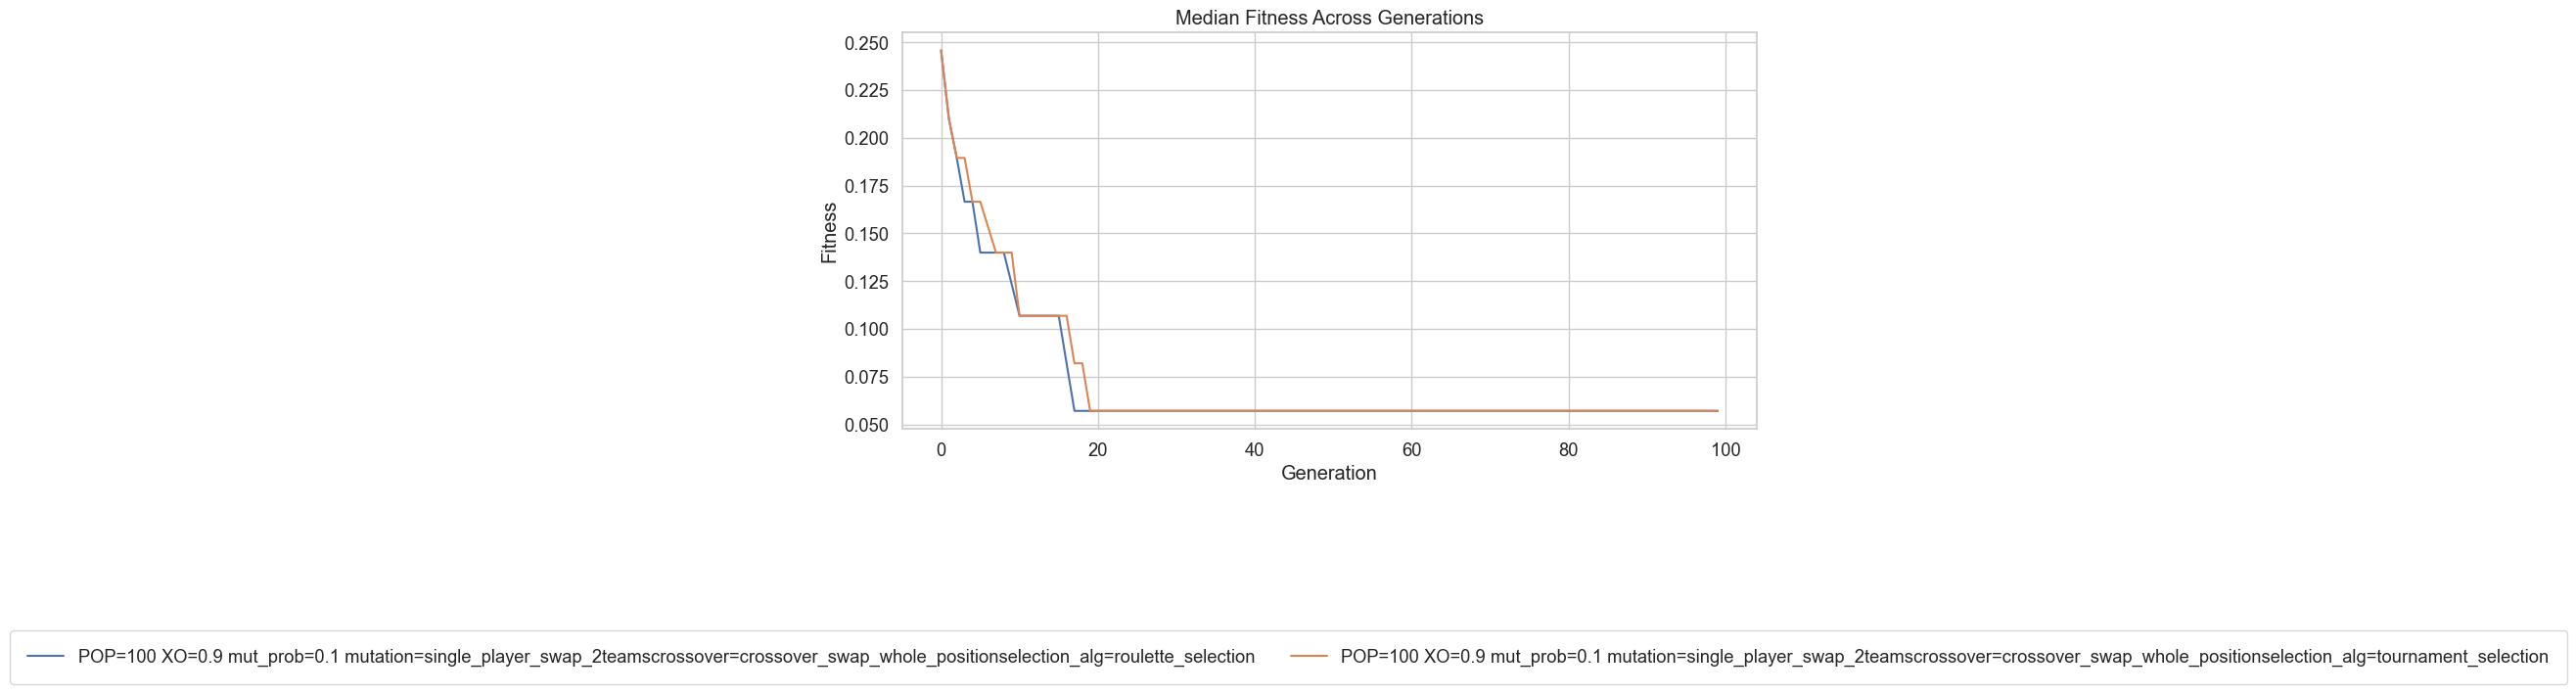

In [96]:
plot_median_fitness_over_gen(fitness_dfs)